## Exercises large classes (Week_03)

## 1. Working with strings

### a) Import car dataset

In [4]:
# Iport the necessary libraries
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the data 'cars_autoscout24.csv' into a DataFrame
df = pd.read_csv('cars_autoscout24.csv', sep=';', encoding='utf-8')
df


# Change column names to lowercase
df.columns = df.columns.str.lower()
df

,offer_id,type,price_raw,hp_raw,init_regist,mileage_raw,fuel_type,transmission,description
0,7324420,AUDI A5 Sportback 3.0 TDI quattro S-tronic (Li...,CHF 22'500.–,245 PS,10.2014,75'000 km,Diesel,Automatisiertes Schaltgetriebe,Hubraum: 2'967 cm3 Zylinder: 6 Anhängelast geb...
1,7512768,MERCEDES-BENZ SLK 200 7G-Tronic (Cabriolet),CHF 23'749.–,184 PS,6.2013,46'655 km,Benzin,Automat sequentiell,Hubraum: 1'796 cm3 Zylinder: 4 Letzte Prüfung:...
2,7512034,MERCEDES-BENZ C 350 Avantgarde 4Matic 7G-Troni...,CHF 18'500.–,306 PS,6.2011,138'955 km,Benzin,Automat sequentiell,Hubraum: 3'498 cm3 Zylinder: 6 Anhängelast geb...
3,7512728,MERCEDES-BENZ A 45 AMG 4Matic Speedshift 7G-DC...,CHF 36'000.–,360 PS,8.2015,43'000 km,Benzin,Automatisiertes Schaltgetriebe,Hubraum: 1'991 cm3 Zylinder: 4 Letzte Prüfung:...
4,7490242,AUDI A5 Sportback 2.0 TFSI Sport quattro S-tro...,CHF 48'500.–,252 PS,9.2018,43'300 km,Benzin,Automatisiertes Schaltgetriebe,Hubraum: 1'984 cm3 Zylinder: 4 Letzte Prüfung:...
...,...,...,...,...,...,...,...,...,...
3975,7137137,FERRARI F360 Spider (Cabriolet),CHF 58'400.–,400 PS,2.2002,78'000 km,Benzin,Automatisiertes Schaltgetriebe,Hubraum: 3'586 cm3 Zylinder: 8 Letzte Prüfung:...
3976,6758841,MERCEDES-BENZ SL 500 560 SL (Cabriolet),CHF 15'900.–,232 PS,1.1987,315'000 km,Benzin,Automatik-Getriebe,Hubraum: 5'491 cm3 Zylinder: 8 Letzte Prüfung:...
3977,7461330,MERCEDES-BENZ CL 63 AMG 7G-Tronic (Coupé),CHF 42'000.–,525 PS,8.2007,85'000 km,Benzin,Automat sequentiell,Hubraum: 6'209 cm3 Zylinder: 8 Aussenfarbe: sc...
3978,7005403,BMW 328i Cabrio (Cabriolet),CHF 9'980.–,193 PS,8.1995,188'920 km,Benzin,Schaltgetriebe manuell,Hubraum: 2'792 cm3 Zylinder: 6 Anhängelast geb...


### b) Create a new variable 'str_len' containing the length of each string in the variable 'description'.

(array([  1.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   2.,   2.,
          7.,   8.,   7.,   4.,  11.,  24.,  31.,  22.,  29.,  37.,  74.,
         92., 125.,  72., 109., 155., 194., 272., 177., 105., 188., 369.,
        315., 136., 121., 141., 183., 161., 170., 182., 108.,  26.,  56.,
        122.,  91.,  28.,   7.,   9.,   5.]),
 array([ 44.  ,  49.12,  54.24,  59.36,  64.48,  69.6 ,  74.72,  79.84,
         84.96,  90.08,  95.2 , 100.32, 105.44, 110.56, 115.68, 120.8 ,
        125.92, 131.04, 136.16, 141.28, 146.4 , 151.52, 156.64, 161.76,
        166.88, 172.  , 177.12, 182.24, 187.36, 192.48, 197.6 , 202.72,
        207.84, 212.96, 218.08, 223.2 , 228.32, 233.44, 238.56, 243.68,
        248.8 , 253.92, 259.04, 264.16, 269.28, 274.4 , 279.52, 284.64,
        289.76, 294.88, 300.  ]),
 <BarContainer object of 50 artists>)

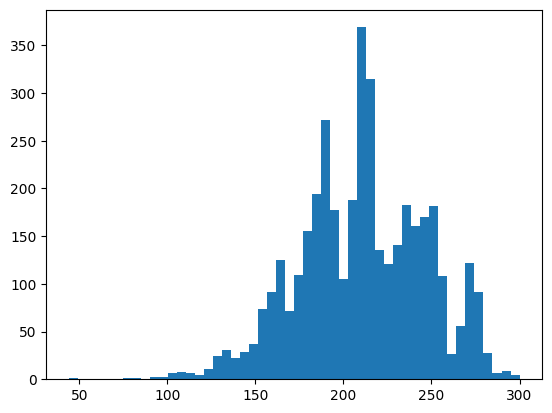

In [6]:
# Create a new variable 'str_len' containing the length of each string in the variable 'description'
df['str_len'] = df['description'].apply(len)
df

# Plot a histogram of the variable 'str_len'
plt.hist(df['str_len'], bins=50)


### c) Create a new variable 'description_upper' from 'description' containing only uppercase letters

In [7]:
# Create a new variable 'description_upper' from 'description' containing only uppercase letters
df['description_upper'] = df['description'].str.upper()
df

### d) Remove all leading and trailing empty spaces in 'description_upper'

In [10]:
# Remove all leading and trailing empty spaces in 'description_upper'
def extract_numerical_value(price):

    match = re.search(r'\d+', price)
    if match:
        return float(match.group().replace('.', ''))
    else:
        return None
    
    df['price'] = df['price_raw'].apply(extract_numerical_value)
    df.head()

## 2.) Working with Regular expressions (regex)

### a) Extract the price as numerical value

In [12]:
# Function to extract numerical values from the price column
def extract_numerical_value(price):
    # Use regex to extract numerical values
    match = re.search(r"(\d+\'\d+)", price)
    if match:
        # Remove the thousands separator and convert to integer
        return float(match.group().replace("'", ''))
    else:
        return None

# Apply the function


SyntaxError: unterminated string literal (detected at line 12) (2895091010.py, line 12)

### b) Extract the original price (germ.: Neupreis) from 'description_upper'

In [13]:
# Function to extract the original price
def extract_original_price(description):
    # Use regex to extract numerical values
    # Extract the numeric value of Neupreis
    neupreis_pattern = r'NEUPREIS:\s*CHF\s*([\d\'.]+)'

    # Extract the numeric value of Neupreis
    match = re.search(neupreis_pattern, description)

    if match:
        # Remove thousands separator (')
        return float(match.group(1).replace("'", ""))
    else:
        None

# Apply the function
df['original_price'] = df['description_upper'].apply(extract_original_price)
df.head()


SyntaxError: unterminated string literal (detected at line 17) (2186648234.py, line 17)

### c) Create a new binary variable 'occassion' with a value of '1' if Fahrzeugart Occasion and a value of '0' otherwise

In [19]:
# Create a new column with the number of occassion cars



# Number of occasion cars



# Show the data

## 3.) Working with pivot tables

### a) Create a subset of the data frame with all missing and duplicated values removed 

In [20]:
# Create a subset of the data without missing values and duplicates



# Check for missing values



# Check for duplicated values


###  b) Create a pivot table

In [21]:
# Create a pivot table with:
# - 'Occassion' as index variable,
# - 'price_numeric' and 'price_original' as values
# - np.mean (i.e. mean from the numpy library) as the aggregation function


# Create a pivot table



# Display the pivot table
